In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error

#  Clustering
  



>   **1. Provide an example of a synthetic dataset where k-means cannot find
correctly the correct clustering and where a Gaussian mixture model can.
Reason why.**.

This example creates a non-linearly separable pattern of two  interleaving semi moons like shape. K-Means assumes linear separability therefore fails to accurately cluster it. GMM can more effectively model the underlying distribution of these non-linear clusters because its flexible approach to cluster shapes and densities.

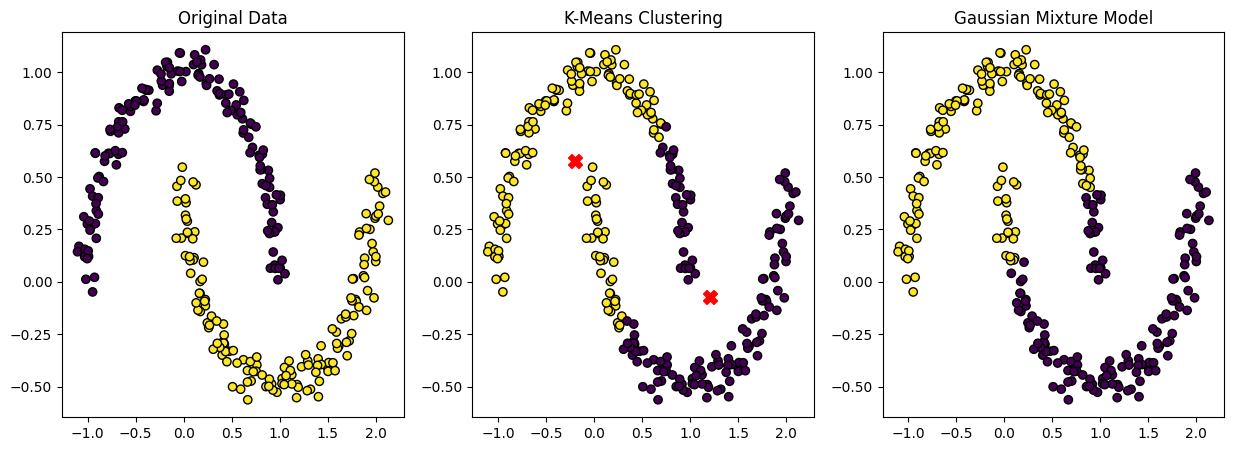

In [3]:

# Create synthetic dataset with moon-shaped clusters
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)


# Apply K-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)




# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
axs[0].set_title("Original Data")

# Plot K-Means result
axs[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[1].set_title('K-Means Clustering')

# Plot GMM result
axs[2].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', edgecolors='k')
axs[2].set_title('Gaussian Mixture Model')

plt.show()


This example shows a synthetic dataset with two clusters having different variances. K-Means struggles with this dataset as it expects clusters to be of similar density. GMM successfully identifies the two clusters with its ability to model different variances.

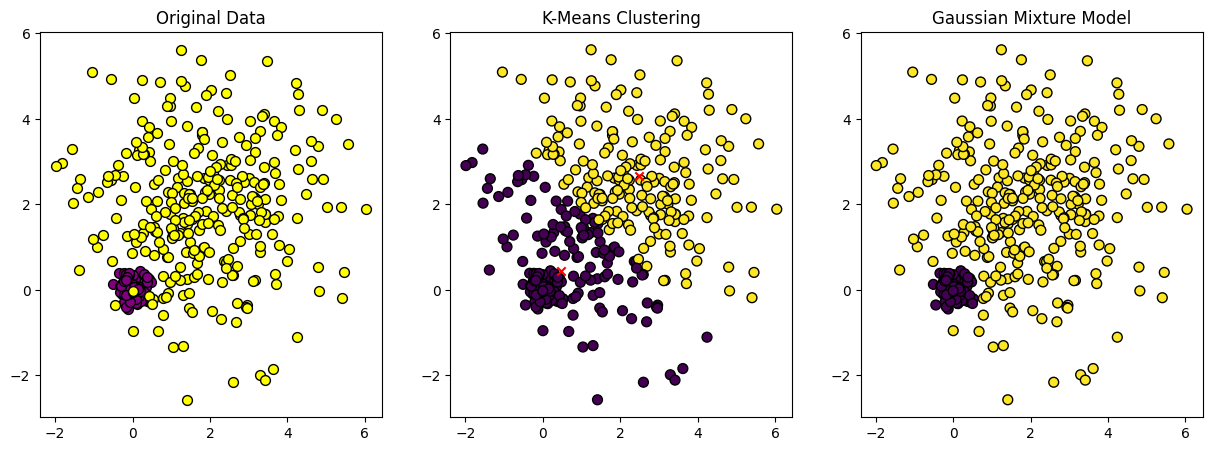

In [4]:

# Generate data with two clusters having different variances
X1, y1 = make_blobs(n_samples=100, centers=[[0, 0]], cluster_std=0.2, random_state=0)
X2, y2 = make_blobs(n_samples=300, centers=[[2, 2]], cluster_std=1.5, random_state=0)
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Apply GMM
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X)



# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X1[:, 0], X1[:, 1], color='purple', edgecolor='k', s=50)
axs[0].scatter(X2[:, 0], X2[:, 1], color='yellow', edgecolor='k', s=50)
axs[0].set_title('Original Data')

# Plot K-Means result
axs[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
axs[1].set_title('K-Means Clustering')

# Plot GMM result
axs[2].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
axs[2].set_title('Gaussian Mixture Model')

plt.show()


Here GMM allows the model to shape the clusters in an elongated or stretched manner if the data suggests so. Because of its flexibility compeared with the strict assumtion of K-Means that clusters are spherical and of roughly equal size, once again GMM performs better.

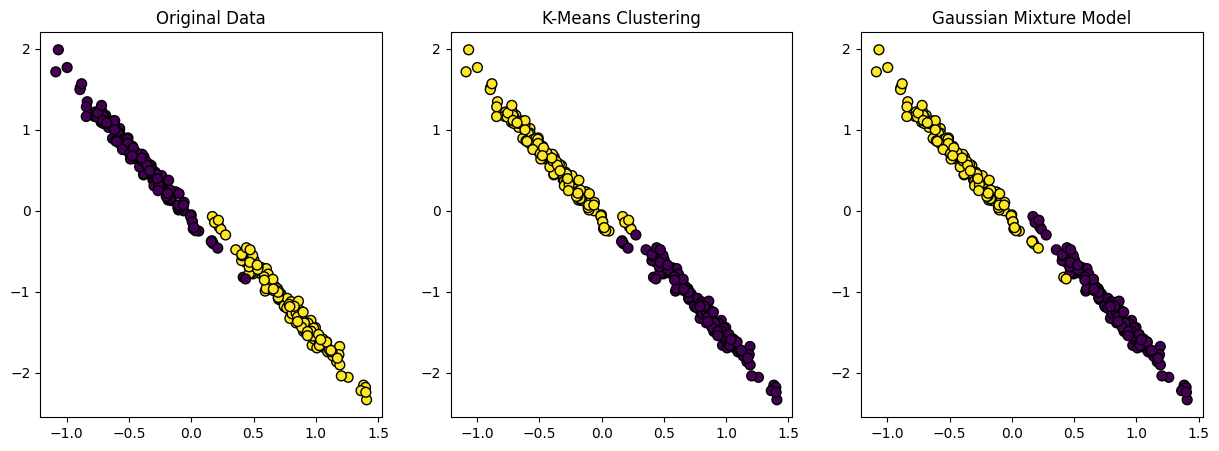

In [5]:

# Generate isotropic Gaussian blobs
X, y = make_blobs(n_samples=300, centers=[[-1, 0], [2, 0]], cluster_std=0.5, random_state=42)

# Apply a transformation to create elongated clusters
transformation = [[0.4, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

# Apply K-Means
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
axs[0].set_title('Original Data')

# Plot K-Means result
axs[1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
axs[1].set_title('K-Means Clustering')

# Plot GMM result
axs[2].scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
axs[2].set_title('Gaussian Mixture Model')

plt.show()





>**2. Provide an example of a synthetic dataset where a too constrained Gaussian mixture model cannot find the correct clustering but a more flexible
Gaussian mixture model can. Reason why.**



In this example we also saw above, a too constrained GMM performs as poorly as the K-Means while the flexible one gives the expected result. What we compeare in this example are differnt types of covariance for the GMM. While for ‘spherical’ each component has its own single variance, therefore the model is too constrained, 'full' covariance gives each component its own general covariance matrix.

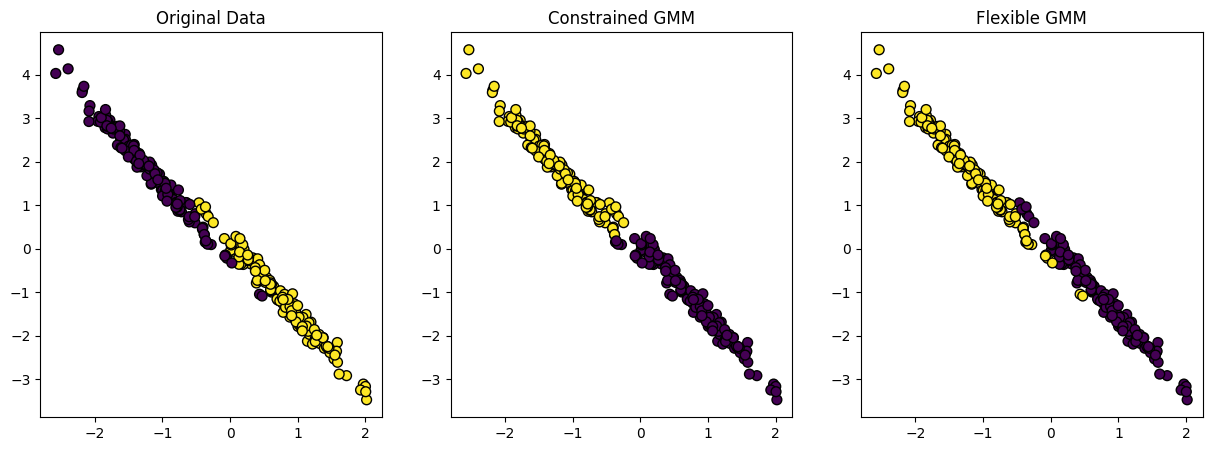

In [ ]:

# Generate isotropic Gaussian blobs and apply a transformation to create elongated clusters
X, _ = make_blobs(n_samples=300, centers=[[-3, 0], [2, 0]],random_state=42)
transformation = [[0.4, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

# Apply constrained GMM (spherical covariance)
gmm_constrained = GaussianMixture(n_components=2, covariance_type='spherical')
gmm_constrained_labels = gmm_constrained.fit_predict(X_aniso)

# Apply flexible GMM (full covariance)
gmm_flexible = GaussianMixture(n_components=2, covariance_type='full')
gmm_flexible_labels = gmm_flexible.fit_predict(X_aniso)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
axs[0].set_title('Original Data')

# Plot constrained GMM result
axs[1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_constrained_labels, cmap='viridis', edgecolor='k', s=50)
axs[1].set_title('Constrained GMM')

# Plot flexible GMM result
axs[2].scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_flexible_labels, cmap='viridis', edgecolor='k', s=50)
axs[2].set_title('Flexible GMM')

plt.show()


# Complete the steps below for the following dataset

      
    X =  −4 2
          1 2
          4 2
          3 2



>  **1. Calculate the mean feature (mean input) and use it to center the dataset.Draw the centered dataset.**




Mean Feature Vector:
[1. 2.]
Centered dataset:
[[-5.  0.]
 [ 0.  0.]
 [ 3.  0.]
 [ 2.  0.]]


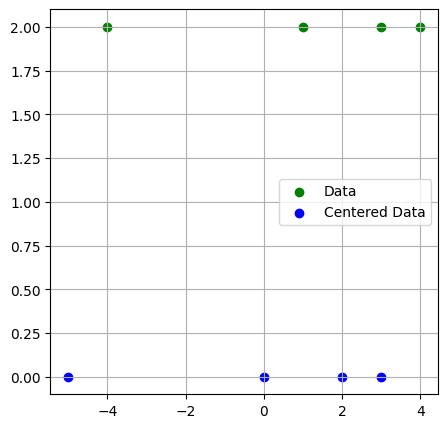

In [ ]:

# Given dataset X from the uploaded image
X = np.array([[-4, 2],
              [1, 2],
              [4, 2],
              [3, 2]])

# Step 1: Calculate the mean feature (mean input) for each feature
mean_X = np.mean(X, axis=0)

print("Mean Feature Vector:")
print(mean_X)

# Step 2: Center the dataset by subtracting the mean feature from the dataset
X_centered = X - mean_X

print("Centered dataset:")
print(X_centered)

# Plotting the centered dataset
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], color='green', label='Data')
plt.scatter(X_centered[:, 0], X_centered[:, 1], color='blue', label='Centered Data')
plt.grid(True)
plt.legend()
plt.show()




> **2. Calculate the covariance matrix and the eigenvectors of the covariance
matrix. You can use any software package.**



In [ ]:

# Calculate the covariance matrix of the centered dataset
covariance_matrix = np.cov(X_centered.T)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Covariance Matrix:\n", covariance_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Covariance Matrix:
 [[12.66666667  0.        ]
 [ 0.          0.        ]]
Eigenvalues:
 [12.66666667  0.        ]
Eigenvectors:
 [[1. 0.]
 [0. 1.]]




> **3. Visualize the principal directions in your drawing. Indicate which vector
corresponds to the first and second principal direction.**



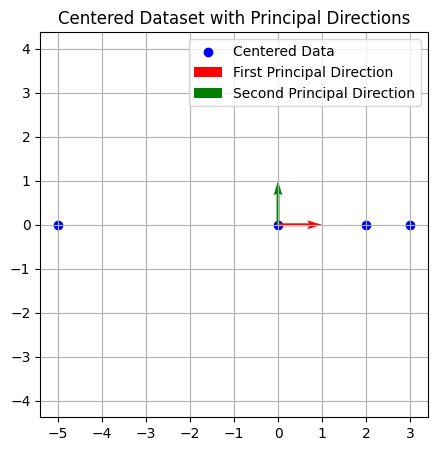

In [ ]:

# Plotting the centered dataset along with the principal directions (eigenvectors)
plt.figure(figsize=(5, 5))
plt.scatter(X_centered[:, 0], X_centered[:, 1], color='blue', label='Centered Data')

# Eigenvector 1 (First principal direction)
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label='First Principal Direction')

# Eigenvector 2 (Second principal direction)
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label='Second Principal Direction')

plt.title('Centered Dataset with Principal Directions')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()




> **4. Calculate the embedding for each sample with help of the eigenvector
matrix. Draw the embedded samples in a new coordinate system such
that the x-axis corresponds to the first principal direction and the y-axis
corresponds to the second principal direction.**



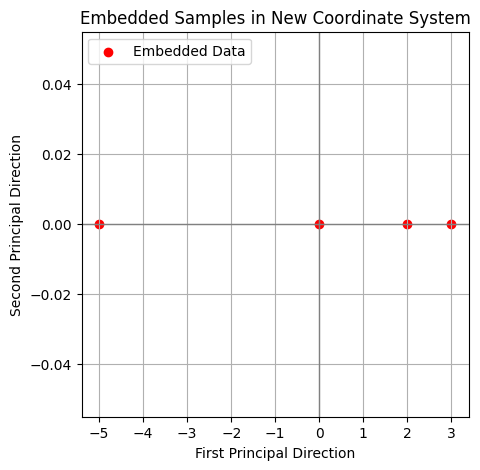

In [ ]:

# Perform the projection onto the eigenvector matrix
# This will give us the coordinates in the new principal component space
embedding_full = X_centered.dot(eigenvectors)

# Create a scatter plot of the embedding along the principal directions
plt.figure(figsize=(5, 5))
plt.scatter(embedding_full[:, 0], embedding_full[:, 1], color='red', label='Embedded Data')
plt.axhline(0, color='grey', lw=1)  # Add horizontal line at zero
plt.axvline(0, color='grey', lw=1)  # Add vertical line at zero
plt.title('Embedded Samples in New Coordinate System')
plt.xlabel('First Principal Direction')
plt.ylabel('Second Principal Direction')
plt.grid(True)
plt.legend()
plt.show()




> **5. Repeat the previous step, but only use the first principal direction to
calculate the embedding. Draw the resulting embeddings in the same
coordinate system you used for V.**



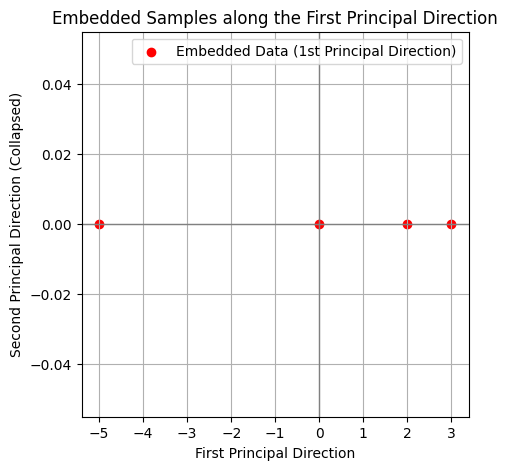

In [ ]:

# Perform the projection onto only the first principal direction
embedding_first = X_centered.dot(eigenvectors[:, 0])

# For visualization, we plot the embedding in a 2D space where the second dimension is zero
# This shows the projection along the first principal direction, with the second direction collapsed
plt.figure(figsize=(5, 5))
plt.scatter(embedding_first, np.zeros_like(embedding_first), color='red', label='Embedded Data (1st Principal Direction)')
plt.axhline(0, color='grey', lw=1)  # Add horizontal line at zero
plt.axvline(0, color='grey', lw=1)  # Add vertical line at zero
plt.title('Embedded Samples along the First Principal Direction')
plt.xlabel('First Principal Direction')
plt.ylabel('Second Principal Direction (Collapsed)')
plt.grid(True)
plt.legend()
plt.show()




> **6. Backtranslate the embeddings from the previous step into the original
vector space. This step requires usage of the eigenvector matrix again.
Draw the obtained reconstructions into the original coordinate system
from.**



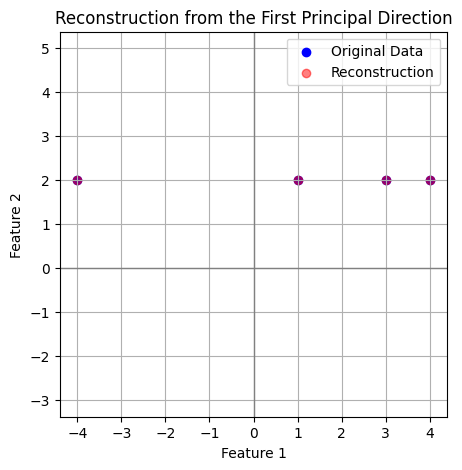

In [ ]:

# Reshape the one-dimensional embeddings for matrix multiplication
embedding_first_reshaped = embedding_first.reshape(-1, 1)

# Multiply by the first eigenvector to backtranslate into the original space
# The eigenvector is reshaped to a 2D column vector for matrix multiplication
reconstruction = embedding_first_reshaped.dot(eigenvectors[:, 0].reshape(1, -1))

# Add the mean to the reconstruction to undo the centering
reconstruction += mean_X

# Plot the original data
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')

# Plot the reconstruction
plt.scatter(reconstruction[:, 0], reconstruction[:, 1], color='red', label='Reconstruction', alpha=0.5)

# Draw lines connecting the original points to their reconstructions
for i in range(X.shape[0]):
    plt.plot([X[i, 0], reconstruction[i, 0]], [X[i, 1], reconstruction[i, 1]], 'k--')

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.title('Reconstruction from the First Principal Direction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()




> **7. Calculate the reconstruction error between the backtranslated embeddings
and the original data points. For that, use the mean squared error (MSE).**



In [ ]:

# Calculate the MSE between the original data points and the reconstructed points
mse = mean_squared_error(X, reconstruction)

print("Mean Squared Error (MSE) between the original data points and the reconstructed points:", mse)


Mean Squared Error (MSE) between the original data points and the reconstructed points: 0.0
